In [2]:
import os
import argparse
import cv2 as cv
import time
import multiprocessing as mp
#from picamera import PiCamera

from utilities import *

In [3]:
def detect_bottle(img):
    t_start_det = time.time()
    hsv_min = np.array([0, 26, 116])
    hsv_max = np.array([178, 54, 166])
    #brick_mask = HSV_mask(img, hsv_min, hsv_max)
    
    
    """"""
    ### IMPORTANT
    beacon_hsv_min = np.array([70, 100, 200])
    beacon_hsv_max = np.array([180, 255, 255])
    beacon_mask = HSV_mask(img, beacon_hsv_min, beacon_hsv_max)
    plt.imshow(beacon_mask)
    plt.show()
    ###
    
    img_out = img.copy()
    """
    rectangles = find_rectangles_around_brick(brick_mask)
    for rect in rectangles:
        #print(rect)
        x1, x2, y1, y2 = rect
        cv.rectangle(img_out, (x2, x1), (y2, y1), (255, 0, 0), 3)
    """
    ROI = img[200:, 0:]
    #print(np.shape(ROI))
    img_gray = cv.cvtColor(ROI, cv.COLOR_BGR2GRAY)
    foundCorner, corners = corner_detection(img_gray)
    print("corners", corners)
    
    img_corners = img.copy()
    for c in corners:
        x = c[0][0]
        y = c[0][1]
        cv.circle(img_corners, (x, y), 10, [0,255,0], -1)
    print("detected corners")
    plt.imshow(img_corners)
    plt.show()
    
        
    # Try to exclude outliers
    cornerList = []
    for i in range(len(corners)):
        c = corners[i].flatten()
        
        isBrick = False
        """"""
        isBeacon = False
        """
        for rect in rectangles:
            if corner_in_rectangle(rect, c):
                isBrick = True  # corner lies inside a rectangle describing a brick
                break
        """
        ### IMPORTANT
        if corner_in_beacon(beacon_mask, c):
            isBeacon = True
        ###
        #print("isBeacon:", isBeacon)
        
        if  not isBeacon:
            min_neighbours = 6  # minimum amount of neighbours
            max_distance = 100  # distance in pixels within the corner must have its neighbours
            isOutlier = corner_is_outlier(corners, i, min_neighbours, max_distance)
            
        """"""
        if not isBeacon and not isOutlier:
            
            cornerList.append(c)

    # TODO add the case where there are more than 1 bottle in the image!

    # Plot a bounding box around the bottle
    has_bottle, center, img_out = add_corners(img_out, cornerList)
    
    if (has_bottle):
        print("[DETECTION] Found a bottle at position ", center)
    else:
        print("[DETECTION] Found no bottle ...")

    t_stop_det = time.time()
    print("[DETECTION] detection time: ", t_stop_det - t_start_det, "seconds")
    return has_bottle, center, img_out


images/noIR/image3.jpg


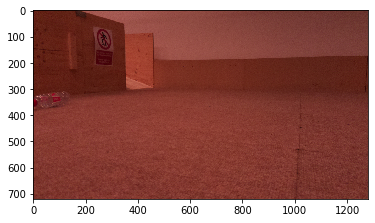

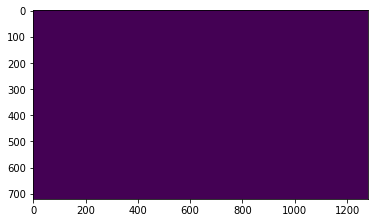

corners [[[ 13. 331.]]

 [[ 27. 333.]]

 [[ 58. 321.]]

 [[ 17. 342.]]

 [[112. 314.]]

 [[ 73. 356.]]

 [[ 37. 367.]]

 [[ 40. 321.]]

 [[356. 256.]]

 [[609. 214.]]]
detected corners


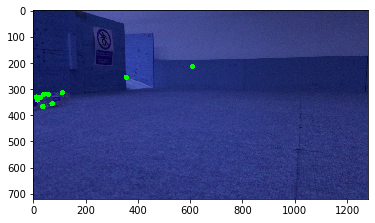

neighbours 6
neighbours 7
neighbours 7
neighbours 7
neighbours 6
neighbours 7
neighbours 7
neighbours 7
neighbours 0
neighbours 0
[DETECTION] Found a bottle at position  [ 62 340]
[DETECTION] detection time:  0.43549680709838867 seconds


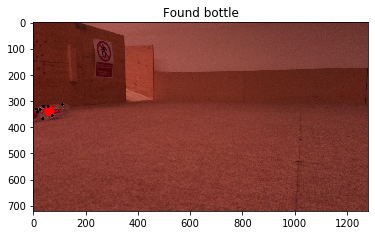

In [3]:
i = 1
while i < 2:
    img_name = "images/noIR/image3.jpg"
    print(img_name)
    plt.imshow(plt.imread(img_name))
    plt.show()
    img = cv.imread(img_name)
    #plt.imshow(img)
    #plt.show()
    has_bottle, center, img_out = detect_bottle(img)

    img_out = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)

    plt.figure()
    if has_bottle:
        plt.title("Found bottle")
    else:
        plt.title("No bottle found")
    plt.imshow(img_out)
    plt.show()
    i += 1


images/noIR/frontal_img0.jpg


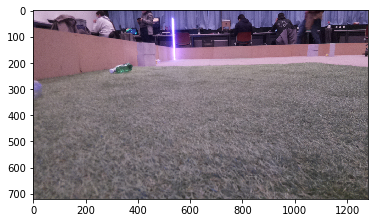

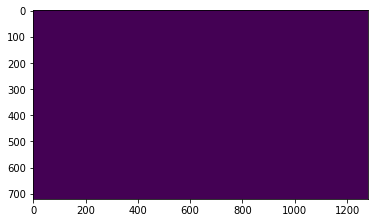

corners [[[ 353.  209.]]

 [[ 363.  209.]]

 [[ 334.  232.]]

 [[ 329.  221.]]

 [[ 343.  214.]]

 [[ 354.  228.]]

 [[1061.  394.]]

 [[1201.  330.]]

 [[1253.  391.]]

 [[1106.  464.]]]
detected corners


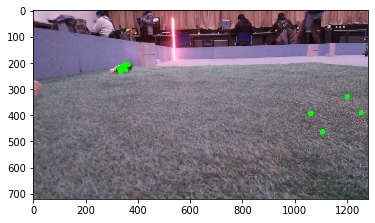

neighbours 5
neighbours 5
neighbours 5
neighbours 5
neighbours 5
neighbours 5
neighbours 1
neighbours 1
neighbours 1
neighbours 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.46355295181274414 seconds


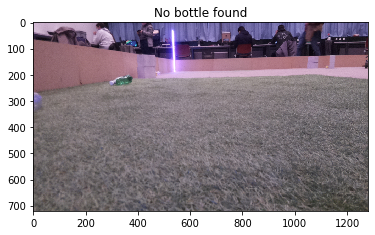

images/noIR/frontal_img1.jpg


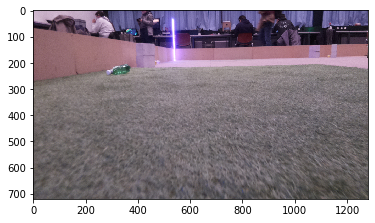

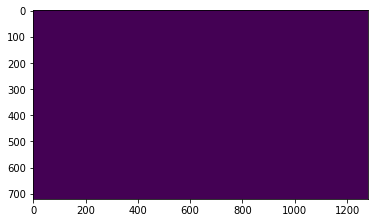

corners [[[ 353.  213.]]

 [[ 333.  219.]]

 [[ 317.  226.]]

 [[ 335.  238.]]

 [[ 323.  237.]]

 [[ 345.  233.]]

 [[ 298.  233.]]

 [[ 982.  383.]]

 [[1249.  351.]]

 [[ 734.  480.]]]
detected corners


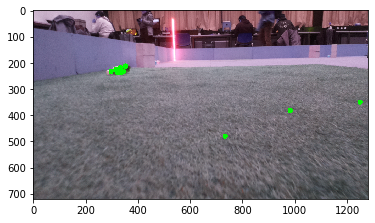

neighbours 6
neighbours 6
neighbours 6
neighbours 6
neighbours 6
neighbours 6
neighbours 6
neighbours 0
neighbours 0
neighbours 0
[DETECTION] Found a bottle at position  [325 225]
[DETECTION] detection time:  0.5700957775115967 seconds


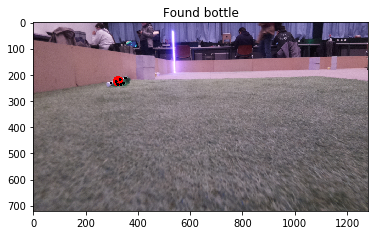

images/noIR/frontal_img2.jpg


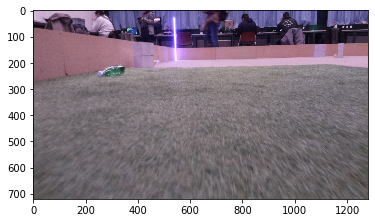

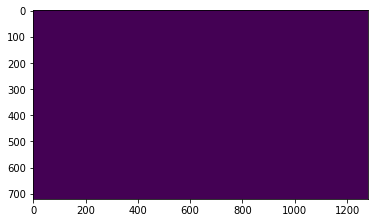

corners [[[340. 215.]]

 [[289. 230.]]

 [[326. 216.]]

 [[308. 223.]]

 [[330. 240.]]

 [[279. 234.]]

 [[287. 245.]]

 [[306. 241.]]

 [[268. 239.]]

 [[317. 240.]]]
detected corners


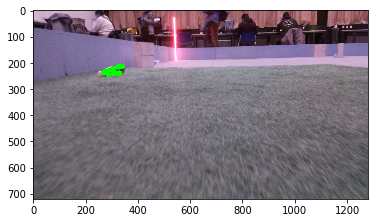

neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
[DETECTION] Found a bottle at position  [304 230]
[DETECTION] detection time:  0.6825520992279053 seconds


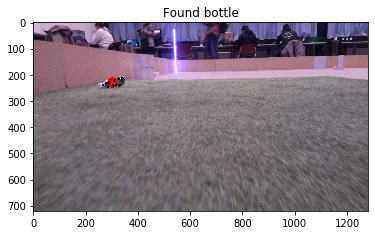

images/noIR/frontal_img3.jpg


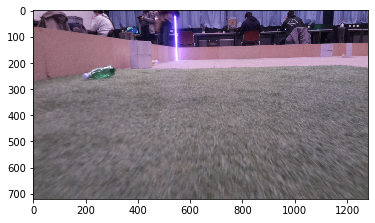

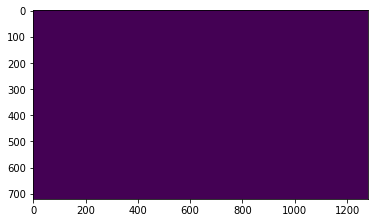

corners [[[299. 215.]]

 [[255. 233.]]

 [[236. 237.]]

 [[264. 224.]]

 [[290. 249.]]

 [[222. 240.]]

 [[196. 243.]]

 [[274. 253.]]

 [[238. 254.]]

 [[214. 248.]]]
detected corners


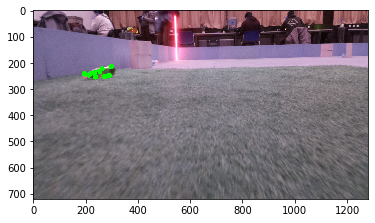

neighbours 8
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 8
neighbours 9
neighbours 9
neighbours 9
[DETECTION] Found a bottle at position  [247 234]
[DETECTION] detection time:  0.5891640186309814 seconds


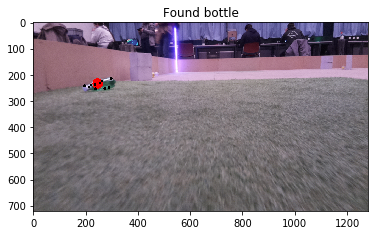

images/noIR/frontal_img4.jpg


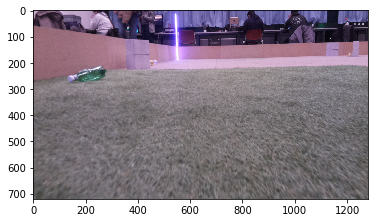

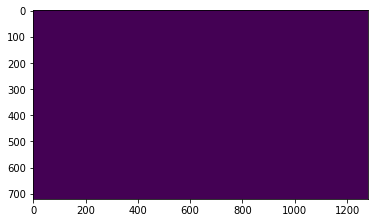

corners [[[219. 235.]]

 [[250. 257.]]

 [[173. 249.]]

 [[234. 260.]]

 [[256. 221.]]

 [[189. 243.]]

 [[205. 238.]]

 [[267. 224.]]

 [[211. 226.]]

 [[227. 228.]]]
detected corners


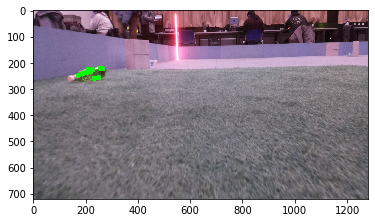

neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 9
[DETECTION] Found a bottle at position  [220 240]
[DETECTION] detection time:  0.6490910053253174 seconds


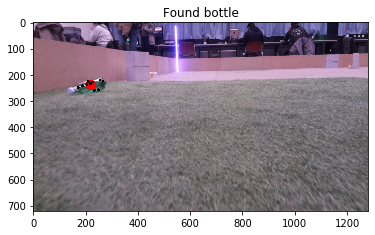

images/noIR/frontal_img5.jpg


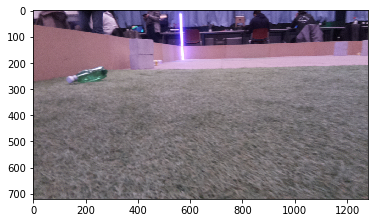

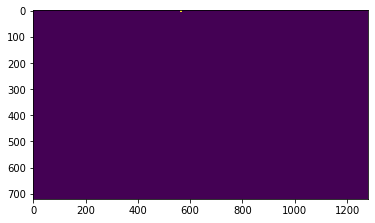

corners [[[255. 260.]]

 [[261. 218.]]

 [[208. 240.]]

 [[208. 230.]]

 [[198. 264.]]

 [[222. 234.]]

 [[135. 255.]]

 [[168. 250.]]

 [[237. 264.]]

 [[273. 225.]]]
detected corners


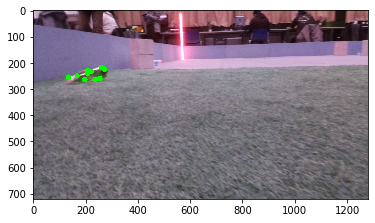

neighbours 8
neighbours 8
neighbours 9
neighbours 9
neighbours 9
neighbours 9
neighbours 5
neighbours 8
neighbours 8
neighbours 7
[DETECTION] Found a bottle at position  [220 241]
[DETECTION] detection time:  0.5438477993011475 seconds


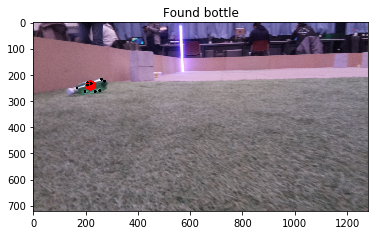

images/noIR/frontal_img6.jpg


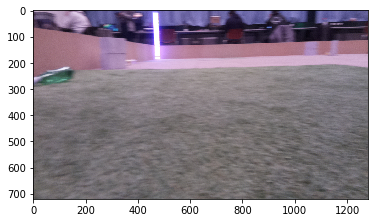

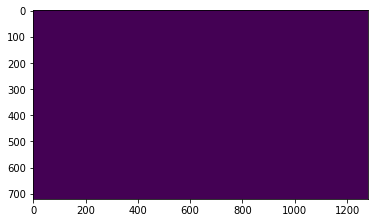

corners [[[137. 219.]]

 [[ 78. 243.]]

 [[129. 264.]]

 [[ 53. 231.]]

 [[ 52. 270.]]

 [[ 37. 251.]]

 [[ 59. 251.]]

 [[ 93. 236.]]

 [[985. 562.]]

 [[ 73. 269.]]]
detected corners


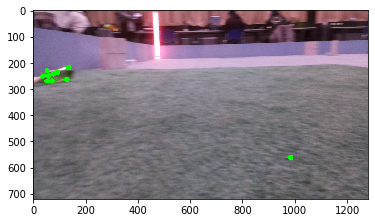

neighbours 7
neighbours 8
neighbours 8
neighbours 8
neighbours 8
neighbours 7
neighbours 8
neighbours 8
neighbours 0
neighbours 8
[DETECTION] Found a bottle at position  [ 87 244]
[DETECTION] detection time:  0.6200850009918213 seconds


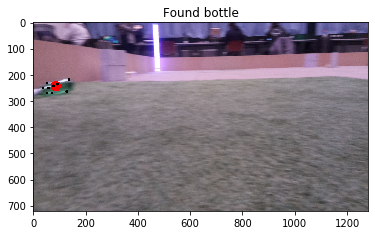

images/noIR/frontal_img7.jpg


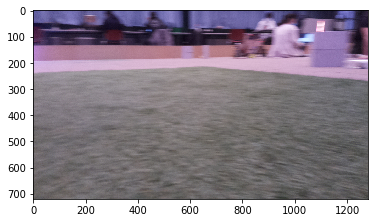

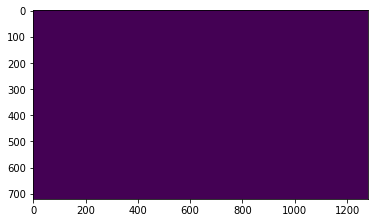

corners [[[1248.  219.]]

 [[1235.  218.]]

 [[1263.  222.]]

 [[1199.  216.]]

 [[1240.  264.]]

 [[1273.  223.]]

 [[ 927.  717.]]

 [[1186.  216.]]

 [[ 648.  643.]]

 [[1208.  665.]]]
detected corners


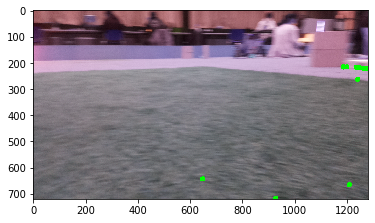

neighbours 6
neighbours 6
neighbours 6
neighbours 6
neighbours 6
neighbours 6
neighbours 0
neighbours 6
neighbours 0
neighbours 0
[DETECTION] Found a bottle at position  [1229  240]
[DETECTION] detection time:  0.6649129390716553 seconds


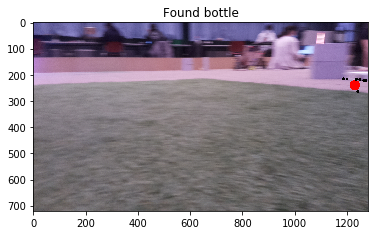

images/noIR/frontal_img8.jpg


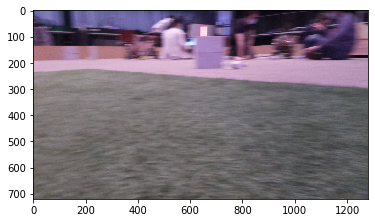

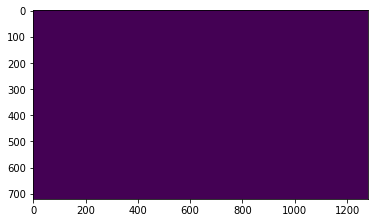

corners [[[ 766.  221.]]

 [[ 784.  223.]]

 [[1251.  693.]]

 [[  53.  650.]]

 [[ 712.  203.]]

 [[ 852.  621.]]

 [[1225.  434.]]

 [[1240.  292.]]

 [[ 718.  219.]]

 [[1189.  718.]]]
detected corners


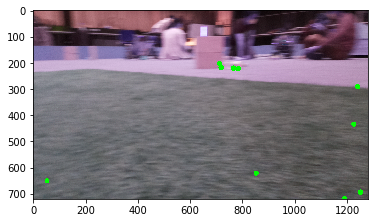

neighbours 3
neighbours 3
neighbours 1
neighbours 0
neighbours 3
neighbours 0
neighbours 0
neighbours 0
neighbours 3
neighbours 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.5406100749969482 seconds


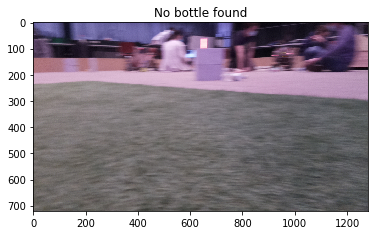

images/noIR/frontal_img9.jpg


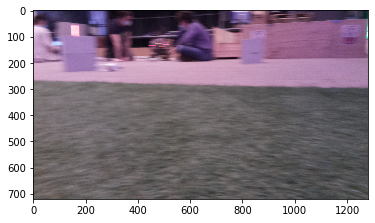

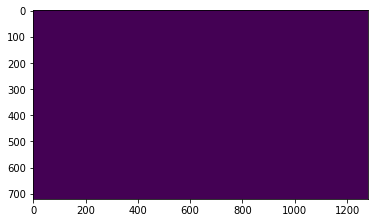

corners [[[ 292.  229.]]

 [[ 254.  206.]]

 [[ 315.  232.]]

 [[ 319.  205.]]

 [[ 304.  231.]]

 [[1243.  691.]]

 [[1253.  299.]]

 [[  19.  636.]]

 [[ 281.  233.]]

 [[1173.  294.]]]
detected corners


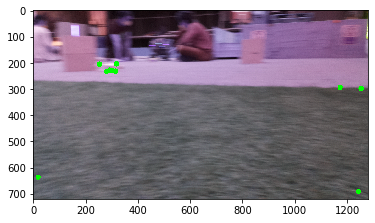

neighbours 5
neighbours 5
neighbours 5
neighbours 5
neighbours 5
neighbours 0
neighbours 1
neighbours 0
neighbours 5
neighbours 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.4452650547027588 seconds


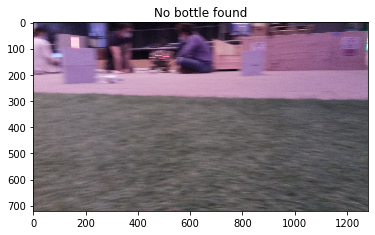

images/noIR/frontal_img10.jpg


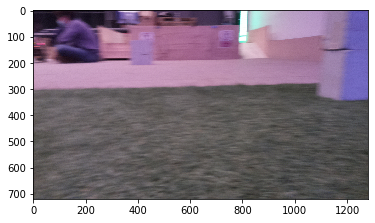

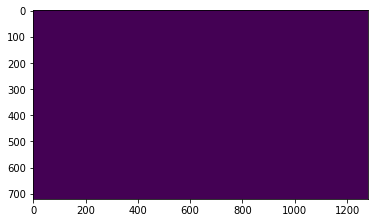

corners [[[1253.  540.]]

 [[  97.  201.]]

 [[1120.  333.]]

 [[1190.  713.]]

 [[ 395.  297.]]

 [[1083.  281.]]

 [[1079.  317.]]

 [[ 792.  652.]]

 [[  46.  374.]]

 [[ 359.  296.]]]
detected corners


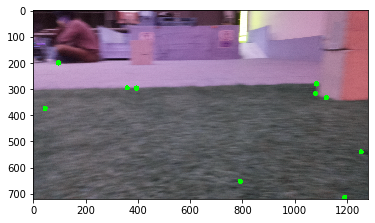

neighbours 0
neighbours 0
neighbours 2
neighbours 0
neighbours 1
neighbours 2
neighbours 2
neighbours 0
neighbours 0
neighbours 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.42838191986083984 seconds


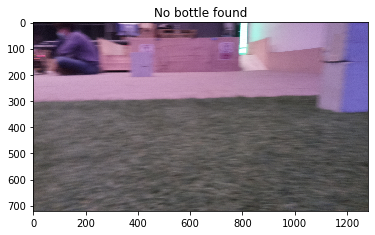

images/noIR/frontal_img11.jpg


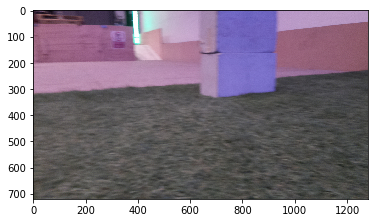

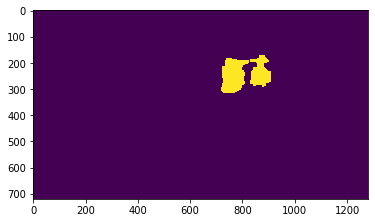

corners [[[1136.  689.]]

 [[   9.  202.]]

 [[1048.  517.]]

 [[ 548.  717.]]

 [[ 370.  694.]]

 [[1129.  697.]]

 [[1176.  528.]]

 [[1080.  533.]]

 [[ 123.  693.]]

 [[1207.  524.]]]
detected corners


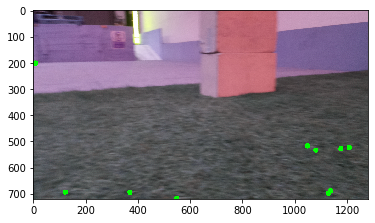

neighbours 1
neighbours 0
neighbours 1
neighbours 0
neighbours 0
neighbours 1
neighbours 2
neighbours 2
neighbours 0
neighbours 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.43241119384765625 seconds


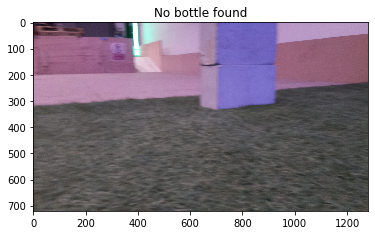

images/noIR/frontal_img12.jpg


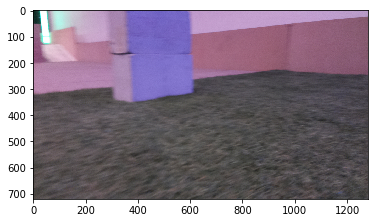

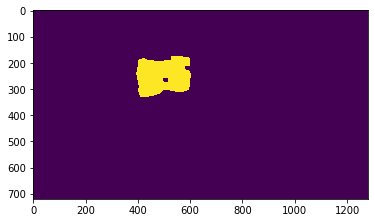

corners [[[1098.  487.]]

 [[1067.  382.]]

 [[1270.  649.]]

 [[1084.  689.]]

 [[1065.  563.]]

 [[ 230.  298.]]

 [[ 939.  537.]]

 [[1115.  650.]]

 [[1177.  655.]]

 [[1050.  606.]]]
detected corners


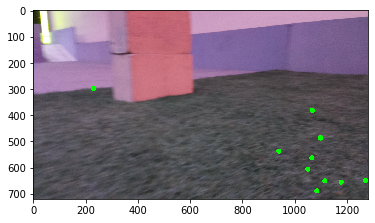

neighbours 1
neighbours 0
neighbours 1
neighbours 3
neighbours 2
neighbours 0
neighbours 0
neighbours 3
neighbours 3
neighbours 3
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.4298388957977295 seconds


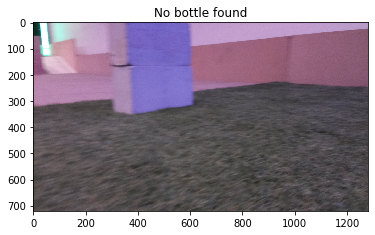

images/noIR/frontal_img13.jpg


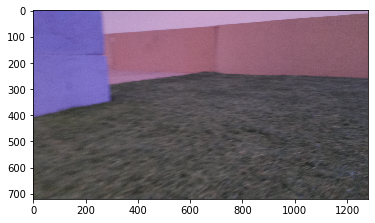

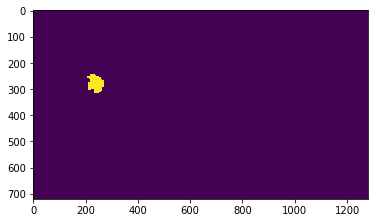

corners [[[1210.  622.]]

 [[1022.  541.]]

 [[1168.  496.]]

 [[1125.  498.]]

 [[1243.  553.]]

 [[1209.  577.]]

 [[1129.  667.]]

 [[1196.  688.]]

 [[1055.  599.]]

 [[ 983.  690.]]]
detected corners


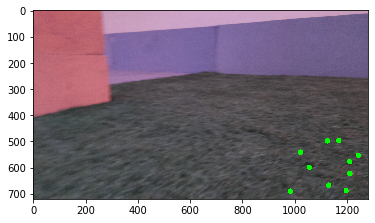

neighbours 4
neighbours 1
neighbours 3
neighbours 1
neighbours 3
neighbours 3
neighbours 2
neighbours 2
neighbours 1
neighbours 0
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.4583740234375 seconds


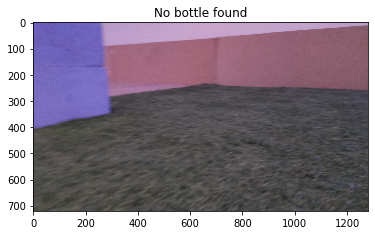

images/noIR/frontal_img14.jpg


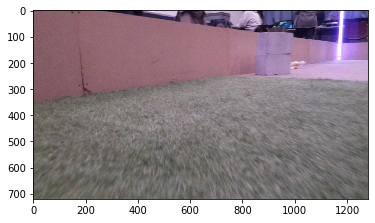

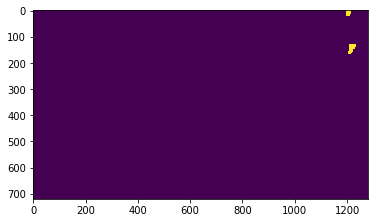

corners [[[ 982.  221.]]

 [[1007.  222.]]

 [[ 994.  220.]]

 [[ 420.  368.]]

 [[ 501.  395.]]

 [[ 850.  246.]]

 [[ 494.  327.]]

 [[ 980.  241.]]

 [[ 471.  455.]]

 [[ 510.  347.]]]
detected corners


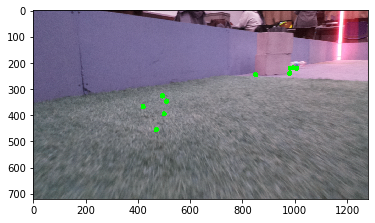

neighbours 3
neighbours 3
neighbours 3
neighbours 3
neighbours 4
neighbours 0
neighbours 3
neighbours 3
neighbours 1
neighbours 3
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.4185500144958496 seconds


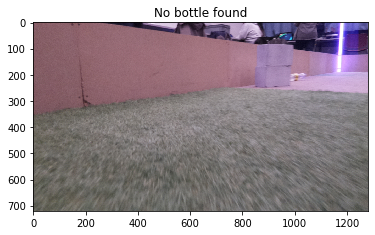

In [4]:
i = 0
while i < 15:
    img_name = "images/noIR/frontal_img"+str(i)+".jpg"
    print(img_name)
    plt.imshow(plt.imread(img_name))
    plt.show()
    img = cv.imread(img_name)
    #plt.imshow(img)
    #plt.show()
    has_bottle, center, img_out = detect_bottle(img)

    img_out = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)

    plt.figure()
    if has_bottle:
        plt.title("Found bottle")
    else:
        plt.title("No bottle found")
    plt.imshow(img_out)
    plt.show()
    i += 1

In [4]:
"""
queue = mp.Queue()
e_bottle = mp.Event()
Z = np.array([[2714/2, 0, 640], [0, 2714/2, 360], [0, 0, 1]])
Zi = np.linalg.inv(Z)
x_c = 640
y_c = 360
r2 = Zi.dot([x_c, y_c, 1.0])
filename = "images/noIR/image3.jpg"
q = detect_bottle(queue, e_bottle, Zi, r2, filename)
bottle_pos = q.get()
bottle_pos
"""

neighbours 6
neighbours 7
neighbours 7
neighbours 7
neighbours 6
neighbours 7
neighbours 7
neighbours 7
neighbours 0
neighbours 0
[DETECTION] Found a bottle at position  [ 62 340] bottle position [0.8        0.40288195]
center bottle: [ 62 340]


array([0.8       , 0.40288195])

In [5]:
bottle_pos[0]

0.8

In [6]:
bottle_pos[1]

0.40288195247948